# HAIID lab 1 

Lab by Ahmadsho Akdodshoev

email: a.akdodshoev@innopolis.university

In this lab we will learn how to 

- load a dataset
- train a simple regression model
- host a local server that will use our trained model
- interact with the server

Download ```python 3.10``` and all the neccessary extension to run this colab notebook.

Let's start with python dependencies (libraries). For now we will not get into python _virtual environments_. Run the following commands to install the neccessary libraries  

In [1]:
pip install numpy pandas # these are used to process data

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn # this is used to train a model

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib # this is used to visualize the data

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fastapi uvicorn # these are used to host a server

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install requests # this will be used to interact with the server

Note: you may need to restart the kernel to use updated packages.


Import all neccessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pickle
import requests

KeyboardInterrupt: 

## Data

Let us prepare the data

In [ ]:
data = pd.read_csv("SOCR-HeightWeight.csv", index_col=["Index"])
data

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


We can see that the data is not given in the metric system. Let's convert it to _cm_ and _kg_ 

In [ ]:
def convert_to_metric(df):
    df['Height'] = df['Height(Inches)'] * 2.54
    df['Weight'] = df['Weight(Pounds)'] * 0.453592
    return df

data_metric = convert_to_metric(data)
data_metric.describe()

,Height(Inches),Weight(Pounds),Height,Weight
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,67.993114,127.079421,172.702509,57.642209
std,1.901679,11.660898,4.830264,5.289290
min,60.278360,78.014760,153.107034,35.386871
25%,66.704397,119.308675,169.429170,54.117461
50%,67.995700,127.157750,172.709078,57.677738
75%,69.272958,134.892850,175.953312,61.186318
max,75.152800,170.924000,190.888112,77.529759


Now we have some columns that we no longer need. Let's drop them

In [ ]:
data = data_metric.drop(columns=["Height(Inches)", "Weight(Pounds)"])
data.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,172.702509,57.642209
std,4.830264,5.289290
min,153.107034,35.386871
25%,169.429170,54.117461
50%,172.709078,57.677738
75%,175.953312,61.186318
max,190.888112,77.529759


Let's check whether we have some missing data or not

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


We can see that there is no missing information. Let's now visualize our data

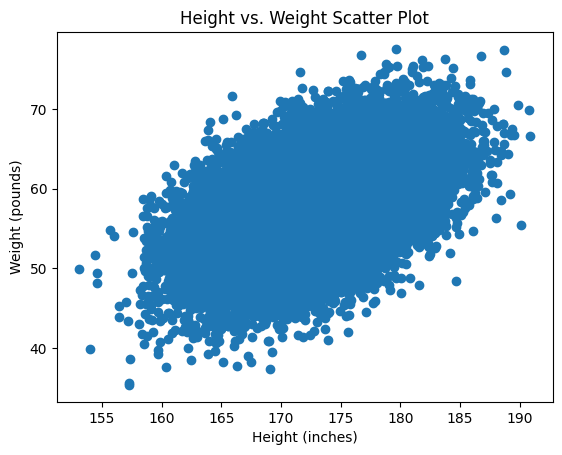

In [ ]:
plt.scatter(x=data["Height"], y=data["Weight"])
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Height vs. Weight Scatter Plot")
plt.show()

It looks like there is a linear correlation between height and weight. 

This means that finding a straight line to describe weight in terms of height can yeild sufficiently accurate results

The model will try to perform the following,

find such parameters $a$ and $b$ that $$\hat w = a\cdot h + b$$ and the sum of squared errors is minimized $$\min_{a,b}\sum_{i=1}^n(w_i - \hat w) $$ 

## Model

We need to do two things before training a model

- split the data to have a training set and a testing set 
- set a target that we want to predict (in our case it is weight)

In [ ]:
# Feature (Height) and target (Weight)
X = data[['Height']]  # Features
y = data['Weight']    # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 20000
Testing set size: 5000


Now we can train the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now, before calling it a day, we have to assess the performance of out model 

In [ ]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 21.086446962521904
R^2: 0.26059113512888576


In general, these scores/metrics should not be interpreted without examining how the model fits the given data (more on that in the ML course). 

To examine the model, we can simply plot the learnt line. But we first need to do the following

In [ ]:
line_x = X  # Use the full dataset's X for the line
line_y = model.predict(line_x)  # Predicted values for the regression line

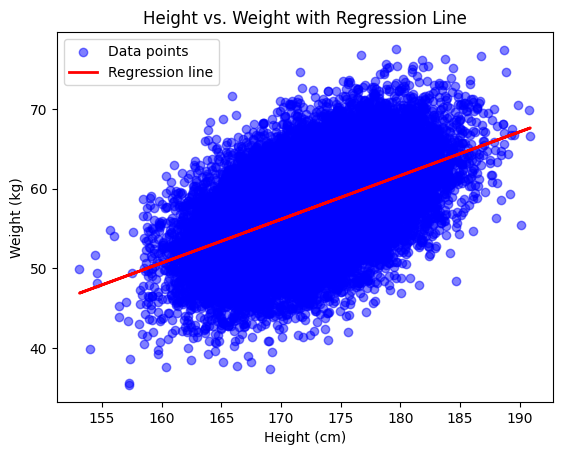

In [ ]:
# Plot the data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

# Plot the regression line
plt.plot(line_x, line_y, color='red', linewidth=2, label='Regression line')

# Add labels and legend
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs. Weight with Regression Line')
plt.legend()
plt.show()

The model had learned some correlation, and there is definitely a line that could model the data more accurately.

I will leave the improvement part as a bonus for you

Now, we need to save the learned parameters (recall $a$ and $b$ from the formula above)

In [8]:
# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

NameError: name 'pickle' is not defined

## Interaction with the API

Before moving on, you will have to start the server. use the following command in your **terminal** to do it 

```
uvicorn server:app --reload
```

In [7]:
req = {"height": 180}

route_url = "http://127.0.0.1:8000/height/"

res = requests.post(url=route_url, json=req)

print(res.status_code) # Should be 200 if successful
print(res.json()) 

NameError: name 'requests' is not defined